# Data mining of Academic Performance in Portuguese Secondary Schools

Purpose and goal: This is a machine learning project examining the effects of various predictors on student performance, measuring in grades. 

Dataset and Attribute information:
    
The student-mat.csv refers to mathematics course grades
The student-por.csv refers to Portuguese course grades.

Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:

1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

2 sex - student's sex (binary: 'F' - female or 'M' - male)

3 age - student's age (numeric: from 15 to 22)

4 address - student's home address type (binary: 'U' - urban or 'R' - rural)

5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')

13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)

16 schoolsup - extra educational support (binary: yes or no)

17 famsup - family educational support (binary: yes or no)

18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

19 activities - extra-curricular activities (binary: yes or no)

20 nursery - attended nursery school (binary: yes or no)

21 higher - wants to take higher education (binary: yes or no)

22 internet - Internet access at home (binary: yes or no)

23 romantic - with a romantic relationship (binary: yes or no)

24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)

26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)

27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

29 health - current health status (numeric: from 1 - very bad to 5 - very good)

30 absences - number of school absences (numeric: from 0 to 93)


These grades are related with the course subject, Math or Portuguese:

31 G1 - first period grade (numeric: from 0 to 20)

32 G2 - second period grade (numeric: from 0 to 20)

33 G3 - final grade (numeric: from 0 to 20, output target)

Given that the final grade is the definite measurement of academic performance, the variable G3 will be used at the outcome variable. Still, all 33 variables will be reviewed with exploratory analysis and will be gradually filtered when contructing the model to predict academic performance.

As the mathematics course and Portuguese course datasets have the same variables, the process for constructing models for both datasets will be quite similar, unless the data in both datasets have significant divergence.

Step 1: Inspecting the mathematics course grades dataset

In [13]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import tree
from sklearn.tree import export_text
from sklearn.decomposition import PCA
from itertools import combinations
from sklearn.model_selection import GridSearchCV

# df1 will contain data for the mathematics grades
df1 = pd.read_csv("/Users/henrycao/Desktop/Data Science/Data-Science-Projects/Student Grades/student/student-mat.csv", sep=";",quotechar='"')

# Inspecting df1
print("The number of students in the math data before pruning is : ", len(df1))
print(df1.head())

# Inspecting df2
# df2 will contain data for the Portuguese grades
df2 = pd.read_csv("/Users/henrycao/Desktop/Data Science/Data-Science-Projects/Student Grades/student/student-por.csv", sep=";",quotechar='"')

print("The number of students in the Portuguese data before pruning is: ", len(df2))
print(df2.head())

# Pruning df1
# Calculating mean and std for df1
mean1 = df1['G3'].mean()
std1 = df1['G3'].std()

# Calculate the Z-score for each value in the 'G3' column
z1 = (df1['G3'] - mean1) / std1

# Keep only the rows with Z-scores between -3 and 3
df1 = df1[(z1 >= -3) & (z1 <= 3)]

# Seeing how many rows remain in df1 after pruning
print("The number of students in the math data after pruning is : ", len(df1))

mean2 = df2['G3'].mean()
std2 = df2['G3'].std()

# Calculate the Z-score for each value in the 'G3' column
z2 = (df2['G3'] - mean2) / std2

# Keep only the rows with Z-scores between -3 and 3
df2 = df2[(z2 >= -3) & (z2 <= 3)]

# Seeing how many rows remain in df2 after pruning
print("The number of students in the Portuguese data after pruning is : ", len(df2))


The number of students in the math data before pruning is :  395
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
The number of students 

There are 30 different attributes in the dataset. Further steps will be needed to find the attributes that are the most significant predictors. Since most of the variables are categorical, we will need further visualisation to find their distributions and trends. From the descriptions of each feature, absences, failures, and studytime are likely to be amongst the most significant predictors. But further analysis is needed to verify this.

The mathematics dataset has 395 rows, while the Portuguese dataset has 649 rows.

Using z-score to prune within a range of -3 to 3, 0 rows were removed for df1, while 16 rows were removed for df2.

Step 2: Plotting histograms for df1 numerical variables

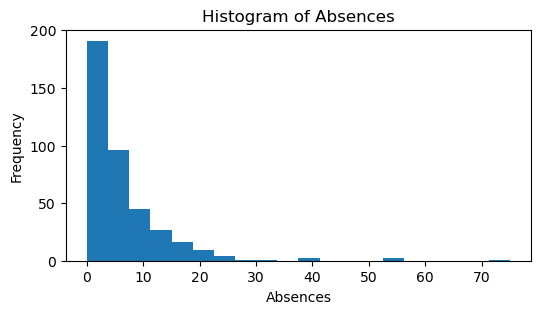

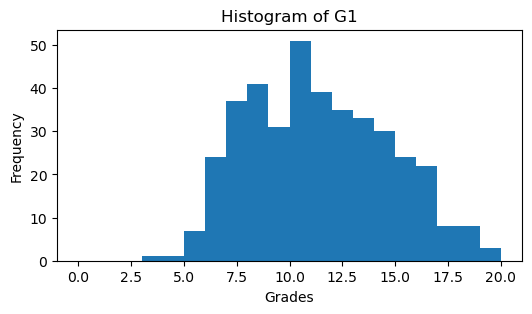

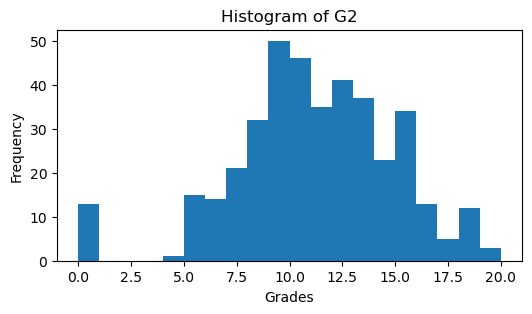

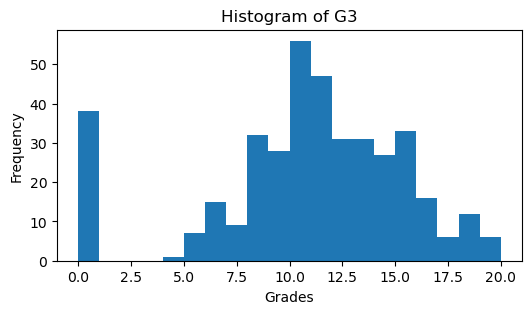

<Figure size 640x480 with 0 Axes>

In [28]:
# Get the numerical columns
numerical_col_names1 = ['absences', 'G1', 'G2', 'G3']

# Plot histograms for numerical variables
df1['absences'].hist(bins=20, figsize=(6,3), grid=False)
plt.xlabel("Absences")
plt.ylabel("Frequency")
plt.title("Histogram of Absences")
plt.show()
plt.clf()

# Plot histograms for numerical variables
grade_vars1 = ['G1', 'G2', 'G3']

for i in grade_vars1:
    df1[i].hist(bins=20, range=(0, 20), figsize=(6,3), grid=False)
    plt.xlabel("Grades")
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {i}")
    plt.show()
    plt.clf()

It appears that absences are centred around the single digits and are heavily skewed towards the right. It will be interesting to see the effects of absences at high values on grades.

G1, G2, and G3 represent the first period grade, second period grade, and final grade for the mathematics course. They all appear to be normally distributed, but G2 and G3 have significant outliers at the value 0.

Since the G3 outliers at the value of 0 weren't removed during pruning, we'll keep the dataset unaltered for now.

Step 3: Plotting Pairwise Plots of df1 variable G3 against absences, G1, and G2

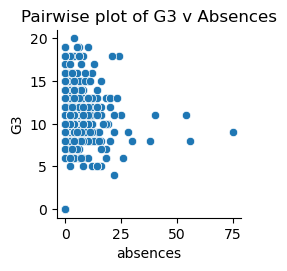

<Figure size 640x480 with 0 Axes>

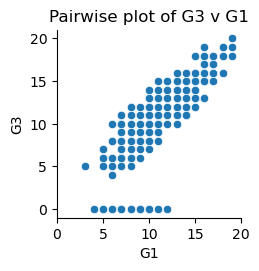

<Figure size 640x480 with 0 Axes>

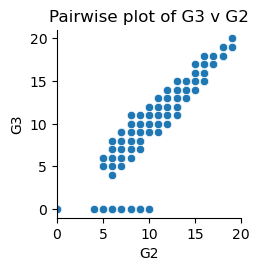

<Figure size 640x480 with 0 Axes>

In [15]:
# Pairplot of G3 v absences
sns.pairplot(data=df1, x_vars='absences', y_vars='G3')
plt.title("Pairwise plot of G3 v Absences")
plt.show()
plt.clf()

# Pairplot of G3 v G1
sns.pairplot(data=df1, x_vars='G1', y_vars='G3')
plt.gca().set_xlim(0, 20)
plt.title("Pairwise plot of G3 v G1")
plt.show()
plt.clf()


# Pairplot of G3 v G2
sns.pairplot(data=df1, x_vars='G2', y_vars='G3')
plt.gca().set_xlim(0, 20)
plt.title("Pairwise plot of G3 v G2")
plt.show()
plt.clf()

On the surface, it appears as though that absences isn't correlated with G3. However, it's worth noting that higher absences never exceed beyond a G3 value of 12, indicating a possible plateau in academic performance for higher rates of absences.

Both G1 and G2 are both linearly correlated with G3, meaning that they are good candidates to become excluded predictors. However, it appears that quite a few students have ended up with G3 values of 0, despite obtaining marks above 0 in G1 and G2. It's possible that other attributes are at play here.

Step 4: Plotting Countplots for df1 Categorical Variables

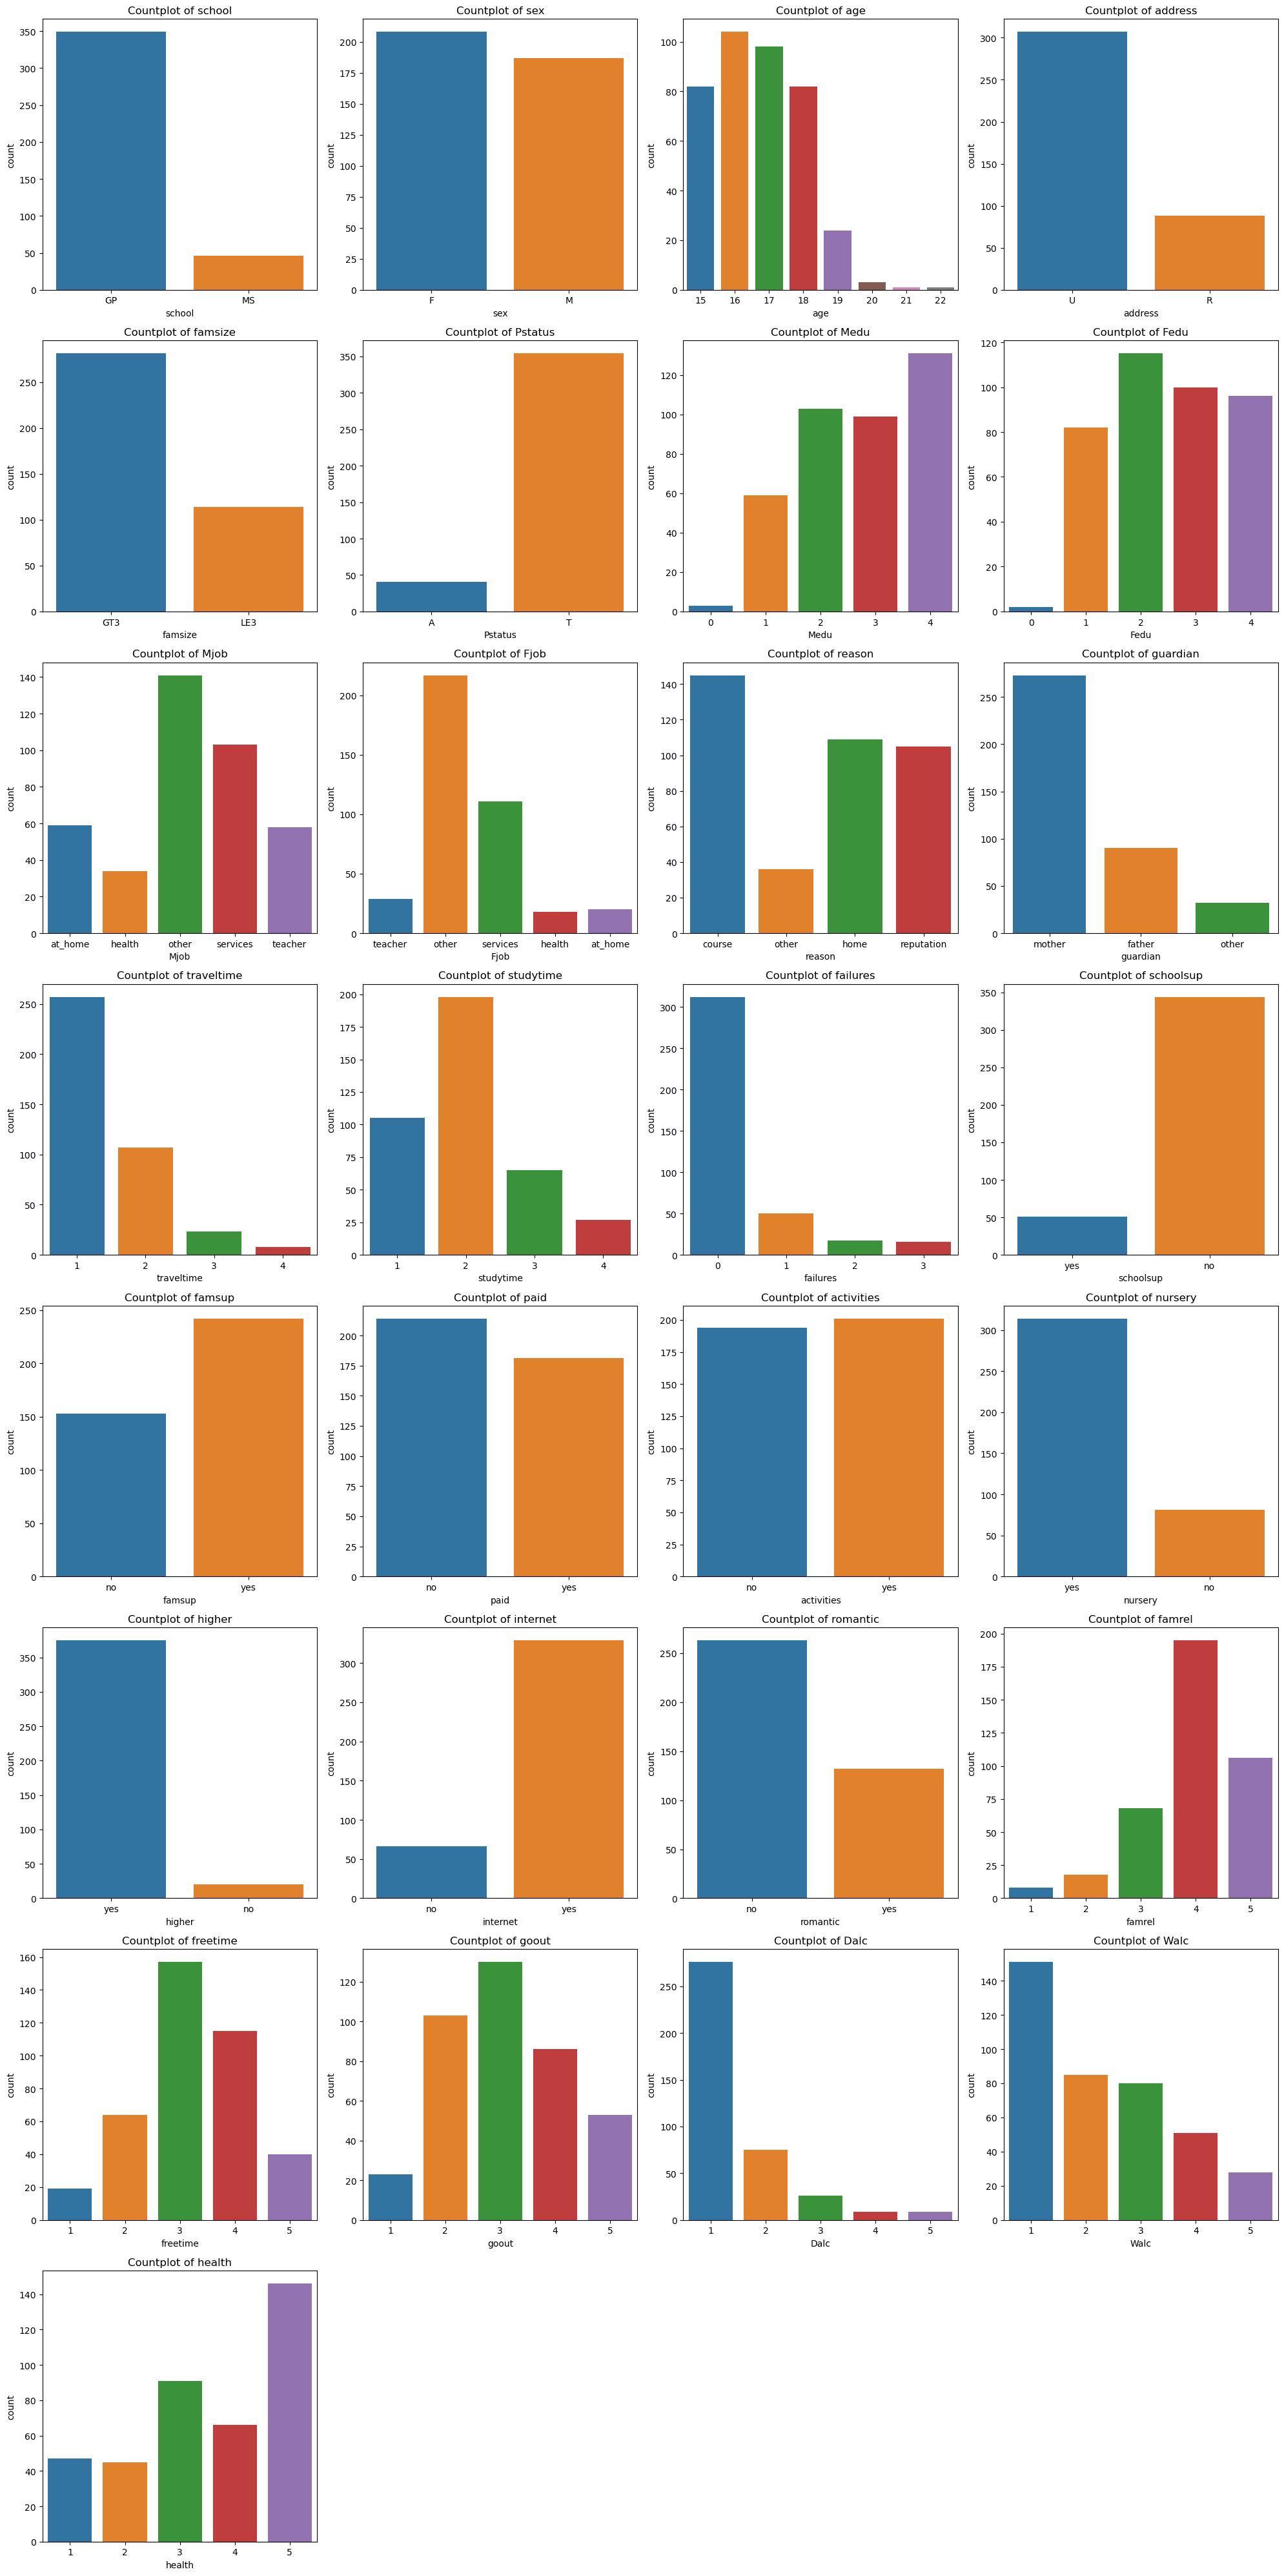

In [29]:
# Get the categorical columns
categorical_cols = df1.drop(numerical_col_names1, axis=1).columns.tolist()

num_plots = len(categorical_cols)
num_cols = 4
num_rows = (num_plots + num_cols - 1) // num_cols

# Plot count plots for categorical variables
plt.figure(figsize=(20, 40))
for i, col in enumerate(categorical_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.title(f"Countplot of {col}")
    sns.countplot(x=col, data=df1)

plt.tight_layout()
plt.show()

Since some of the categorical variables are nominal, while others are ordinal, further visualisation is needed to find their patterns.

Step 5: Plotting Boxplots of df1 variable G3 against Categorical Variables

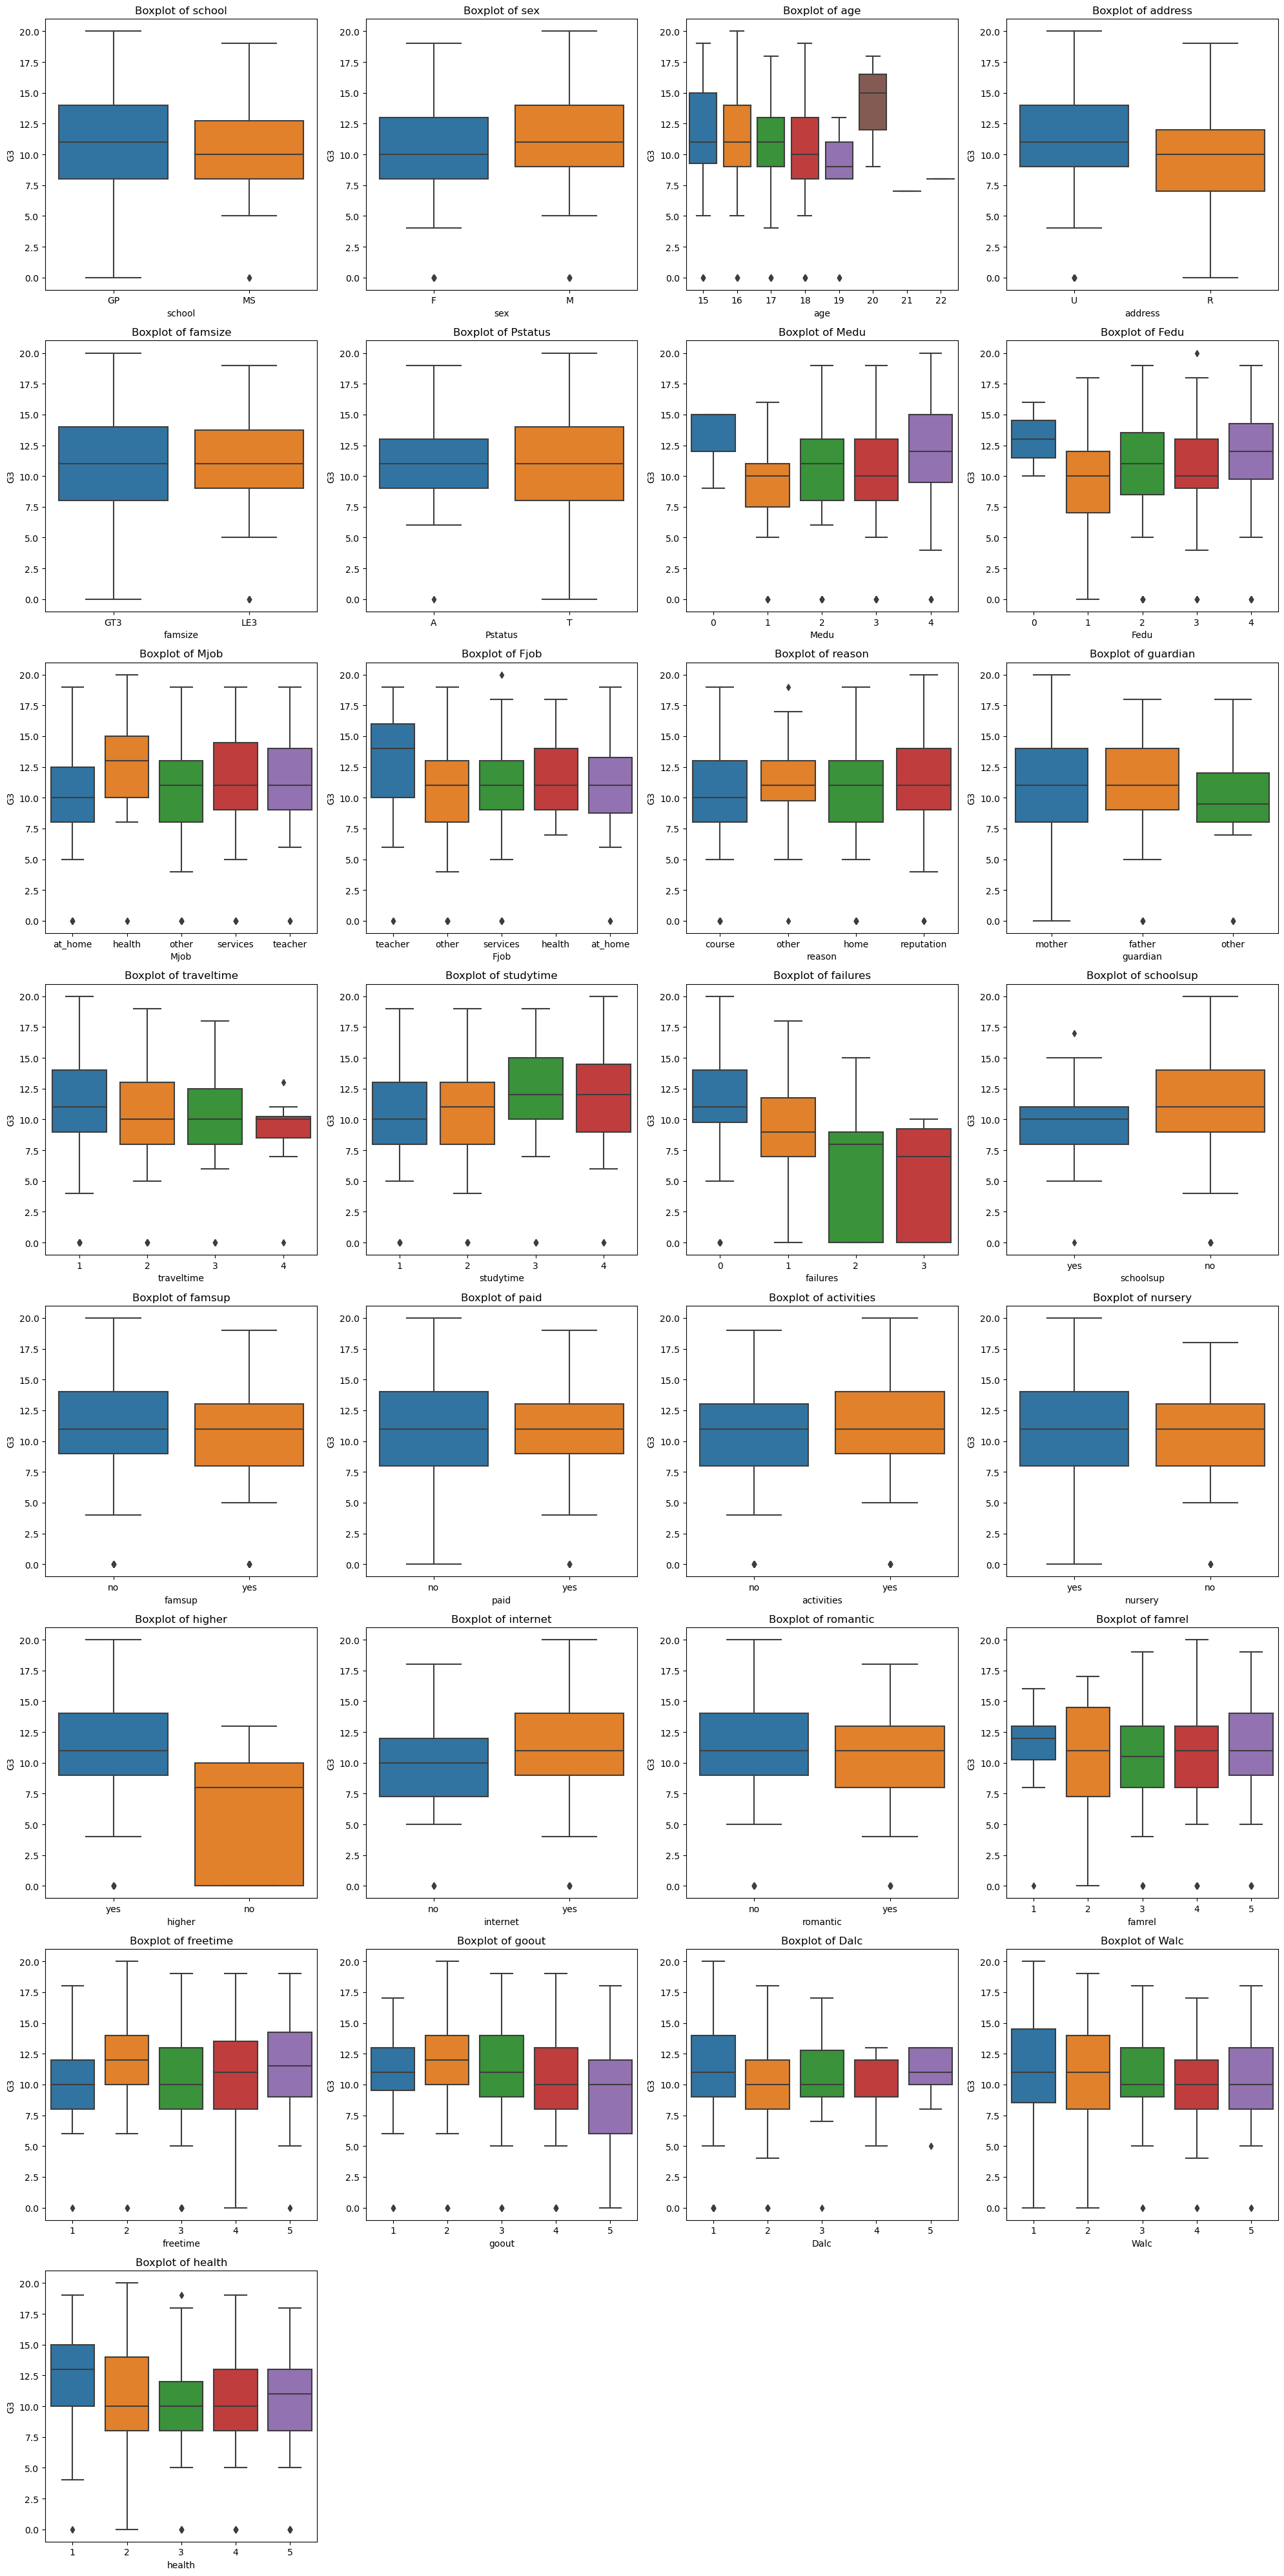

In [30]:
# plot boxplots for each categorical variable against the outcome variable 'G3'
plt.figure(figsize=(20,40))
for i, col in enumerate(categorical_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.title(f"Boxplot of {col}")
    sns.boxplot(x=col, y='G3', data=df1)

plt.tight_layout()
plt.show()

A few of the variables, such as age, studytime, failures, and higher, stand out for having significant variations in their G3 values. Others show noticeable divergence in G3 when taking on specific values. For example, those who have a Fjob value of teacher, meaning the student's father's occupation is teacher, show a higher distribution of G3 compared to other values of Fjob. Further analysis is needed to find the significance of the categorical variables.

Step 6: Examining df1 Covariance

In [2]:
# Defining function for eliminating predictors using eigenvalues and eigenvectors
def eliminate_predictors_eigen(covariance_matrix, predictors, k):
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    eigenpairs = [(np.abs(eigenvalues[i]), eigenvectors[:, i]) for i in range(len(eigenvalues))]
    eigenpairs.sort(key=lambda x: x[0], reverse=True)
    matrix_w = np.hstack((eigenpairs[i][1].reshape(covariance_matrix.shape[0], 1)) for i in range(k))
    reduced_covariance_matrix = np.dot(matrix_w.real, matrix_w.T.real)
    
    eliminated_predictors = []
    for i in range(len(eigenvalues) - k, len(eigenvalues)):
        eliminated_predictors.append(predictors[i])
    
    print(f"For the parameter {k}:")
    print("Eliminated predictors:", eliminated_predictors)
    
#     return reduced_covariance_matrix

# Defining function for eliminating predictors using Principal Component Analysis
def eliminate_predictors_pca(data, k):
    categorical_features = data.columns[data.dtypes == 'object'].tolist()
    numerical_features = data.columns[data.dtypes != 'object'].tolist()
    
    data_cat = pd.get_dummies(data[categorical_features])
    data_num = data[numerical_features]
    data = pd.concat([data_cat, data_num], axis=1)
    pca = PCA(n_components=k)
    reduced_data = pca.fit_transform(data)
    
    explained_variance = pca.explained_variance_ratio_
    components = pca.components_

    df_components = pd.DataFrame(components, columns=data.columns)
    df_components = df_components.T
    df_components['Explained Variance'] = explained_variance

    print(df_components)

    return reduced_data

# Dropping G1 and G2, which are too predictive of G3
drop_vars = ['G1','G2']
df1 = df1.drop(drop_vars,axis=1)

# Defining covariance matrix of df
covariance = df1.drop(['G3'],axis=1).cov()

# # Calling eliminate_predictors_eigen and printing results
for i in range(1,14):
    reduced_covariance_eigen = eliminate_predictors_eigen(covariance, df1.columns, i)
    print(reduced_covariance_eigen)

# Calling eliminate_predictors_pca and printing results
reduced_covariance_pca = eliminate_predictors_pca(df1, 57)
print(reduced_covariance_pca)




For the parameter 1:
Eliminated predictors: ['traveltime']
None
For the parameter 2:
Eliminated predictors: ['guardian', 'traveltime']
None
For the parameter 3:
Eliminated predictors: ['reason', 'guardian', 'traveltime']
None
For the parameter 4:
Eliminated predictors: ['Fjob', 'reason', 'guardian', 'traveltime']
None
For the parameter 5:
Eliminated predictors: ['Mjob', 'Fjob', 'reason', 'guardian', 'traveltime']
None
For the parameter 6:
Eliminated predictors: ['Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime']
None
For the parameter 7:
Eliminated predictors: ['Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime']
None
For the parameter 8:
Eliminated predictors: ['Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime']
None
For the parameter 9:
Eliminated predictors: ['famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime']
None
For the parameter 10:
Eliminated predictors: ['address', 'famsize', 'Pstatus', 'M

/var/folders/s7/x5q362k5511cxdwc3s3hr_5h0000gp/T/ipykernel_48867/1628189438.py:6: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  matrix_w = np.hstack((eigenpairs[i][1].reshape(covariance_matrix.shape[0], 1)) for i in range(k))


When using Eigenvalues and Eigenvectors, it appears that the 13 least relevant variables are as follows, from most to least relevant:

'school', 'sex', 'age', 'address', 

'famsize', 'Pstatus', 'Medu', 'Fedu', 

'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime'


For PCA, it appears that the least relevant variables are: 

school_GP, school_MS, sex_F, sex_M, address_R, address_U, famsize_GT3, famsize_LE3


After using Eigenvalues/Eigenvectors and PCA, the following variables are strong candidates to be dropped:

school_GP, school_MS, sex_F, sex_M, address_R, address_U, famsize_GT3, famsize_LE3, age, Pstatus_A, Pstatus_T, 

reason_course, reason_home, reason_other, reason_ reputation,  guardian_mother, guardian_father, guardian_other, 

traveltime, Medu, Fedu

Although the set of eliminated predictors is promising, further analysis will be needed to optimise the model.

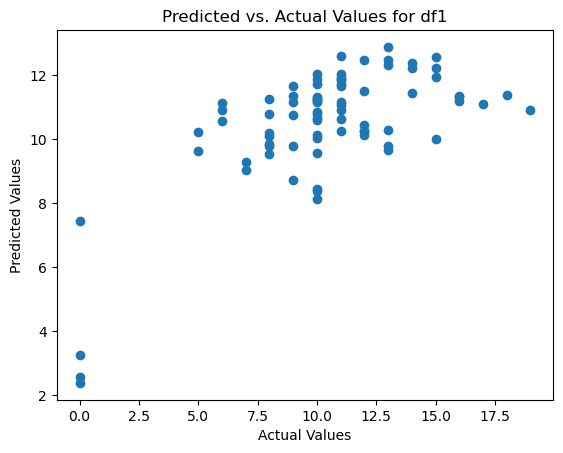

<Figure size 640x480 with 0 Axes>

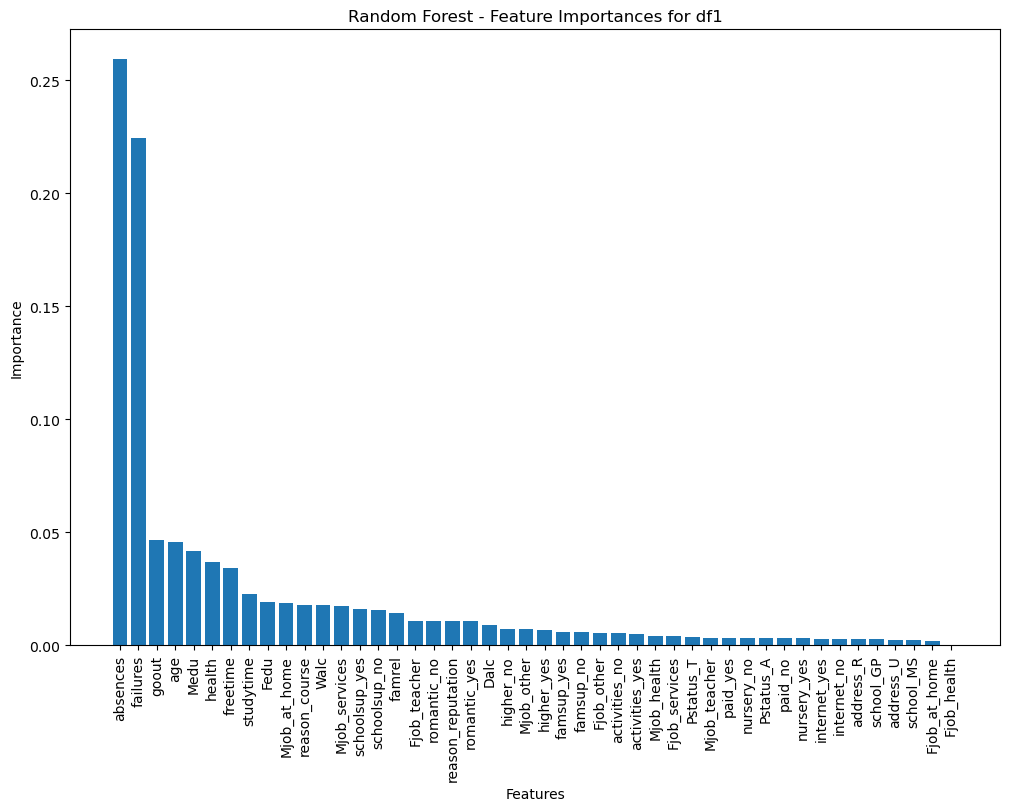

<Figure size 640x480 with 0 Axes>

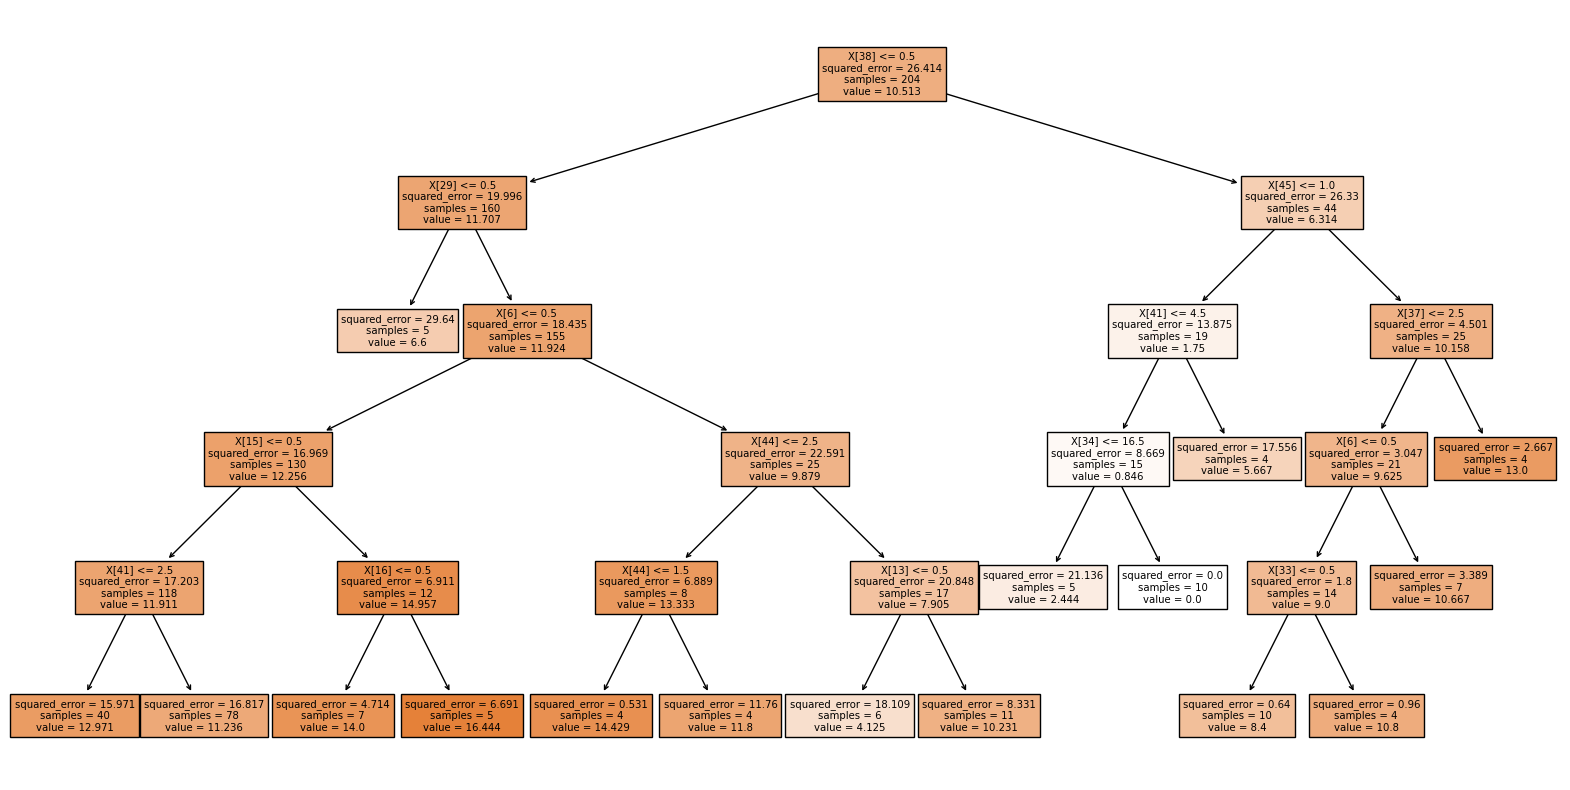

min_samples_split: 2
min_samples_leaf: 4
max_leaf_nodes: 30
random_state: 1
absences 2.60e-01
failures 2.24e-01
goout 4.64e-02
age 4.56e-02
Medu 4.16e-02
health 3.67e-02
freetime 3.42e-02
studytime 2.28e-02
Fedu 1.91e-02
Mjob_at_home 1.87e-02
reason_course 1.81e-02
Walc 1.79e-02
Mjob_services 1.73e-02
schoolsup_yes 1.61e-02
schoolsup_no 1.59e-02
famrel 1.43e-02
Fjob_teacher 1.09e-02
romantic_no 1.08e-02
reason_reputation 1.07e-02
romantic_yes 1.07e-02
Dalc 9.08e-03
higher_no 7.40e-03
Mjob_other 7.33e-03
higher_yes 6.79e-03
famsup_yes 6.10e-03
famsup_no 6.06e-03
Fjob_other 5.51e-03
activities_no 5.30e-03
activities_yes 5.09e-03
Mjob_health 4.16e-03
Fjob_services 4.01e-03
Pstatus_T 3.61e-03
Mjob_teacher 3.43e-03
paid_yes 3.40e-03
nursery_no 3.32e-03
Pstatus_A 3.23e-03
paid_no 3.18e-03
nursery_yes 3.09e-03
internet_yes 2.93e-03
internet_no 2.85e-03
address_R 2.68e-03
school_GP 2.61e-03
address_U 2.54e-03
school_MS 2.53e-03
Fjob_at_home 2.06e-03
Fjob_health 9.67e-05
|--- failures <= 0.50
|

<Figure size 640x480 with 0 Axes>

In [3]:
def regression_ensemble(df, target_column, test_size=0.2, random_state=0):
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    categorical_features = X_train.columns[X_train.dtypes == 'object'].tolist()
    numerical_features = X_train.columns[X_train.dtypes != 'object'].tolist()
    
    param_grid = {'n_estimators': [10000],
                  'max_depth': [5],
                  'min_samples_split': [2],
                  'min_samples_leaf': [4],
                  'max_features': ['auto'],
                  'max_leaf_nodes': [30],
                  'random_state': [1, 42, 123]}
   
    reg = RandomForestRegressor()
    grid_search = GridSearchCV(reg, param_grid, scoring='neg_mean_squared_error', cv=5)
    grid_search.fit(X_train, y_train)
    
    # Get the best estimator from the grid search
    best_reg = grid_search.best_estimator_

    y_pred = grid_search.predict(X_test)
    
    score = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    predictors = X_train.columns
    coefficients = best_reg.feature_importances_
    
    sorted_index = np.argsort(-coefficients)

    # Sort the predictors and coefficients by importance
    predictors = predictors[sorted_index]
    coefficients = coefficients[sorted_index]
    
    # Plot predicted values against actual values
    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Predicted vs. Actual Values for df1")
    plt.show()
    plt.clf()
    
    # Plot feature importances
    plt.figure(figsize=(12,8))
    plt.bar(predictors, coefficients)
    plt.xlabel("Features")
    plt.ylabel("Importance")
    plt.title(f"Random Forest - Feature Importances for df1")
    plt.xticks(rotation=90)
    plt.show()
    plt.clf()
    
    plt.figure(figsize=(20,10))
    plt.title("Random Forest Regression Tree")
    tree.plot_tree(best_reg.estimators_[0], filled=True)
    plt.show()
    plt.clf()
    
    predictors_coefficients = list(zip(predictors, coefficients))
    predictors_coefficients.sort(key=lambda x: x[1], reverse=True)
    
    min_samples_split = best_reg.get_params()['min_samples_split']
    min_samples_leaf = best_reg.get_params()['min_samples_leaf']
    max_leaf_nodes = best_reg.get_params()['max_leaf_nodes']
    random_state = best_reg.get_params()['random_state']

    print("min_samples_split:", min_samples_split)
    print("min_samples_leaf:", min_samples_leaf)
    print("max_leaf_nodes:", max_leaf_nodes)
    print("random_state:", random_state)
    
    for predictor, coefficient in predictors_coefficients:
        print(predictor, '{:.2e}'.format(coefficient))
    
    tree_text = export_text(best_reg.estimators_[0], feature_names=X_train.columns.tolist())
    print(tree_text)
    
    return score, mse


eliminated_predictors1 = ['sex_F', 'sex_M',
                          'famsize_GT3',
                          'famsize_LE3',
                          'reason_home', 'reason_other', 'guardian_father', 
                          'guardian_mother', 'guardian_other', 'traveltime']

# Variables to keep: 'Fjob_health'

categorical_features = df1.columns[df1.dtypes == 'object'].tolist()
numerical_features = df1.columns[df1.dtypes != 'object'].tolist()

df1_cat = pd.get_dummies(df1[categorical_features])
df1_num = df1[numerical_features]
df1 = pd.concat([df1_cat, df1_num], axis=1)

df1 = df1.drop(eliminated_predictors1, axis=1)

print(regression_ensemble(df1, 'G3', test_size=0.2, random_state=1))



Random Forest Regression is chosen, since all predictor variables except for 'absences' is categorical, and the outcome variable 'G3' is numerical.

The initial Random Forest Regression, where all variables were kept, only yields a score and MSE of (0.4007137727467883, 8.1933498840903).

In the beginning, the following variables were dropped: 

school_GP, school_MS, sex_F, sex_M, address_R, address_U, famsize_GT3, famsize_LE3, age, Pstatus_A, Pstatus_T, 

reason_course, reason_home, reason_other, reason_ reputation,  guardian_mother, guardian_father, guardian_other, 

traveltime, Medu, Fedu

After manually testing and using different combinations of eliminated predictors, as well as using GridSearchCV to adjust hyperparameters, the final set eliminated_predictors1 yielded the highest score and lowest MSE of (0.4308362037698541, 7.781520602008244).

The following hyperparameters of GridSearchCV were used: 

'n_estimators': [10000],

'max_depth': [5],

'min_samples_split': [2],

'min_samples_leaf': [4],

'max_features': ['auto'],

'max_leaf_nodes': [30]

'random_state' [1, 42, 123]

Increasing n_estimators to 10000 did lead to longer processing times, but also lead to increased results in score and MSE. The max_depth was set at 5 to compensate for the high n_estimators, thus balancing out in terms of overfitting and underfitting. The best random_state was 1.

Step 8: Plotting histograms for df2 numerical variables

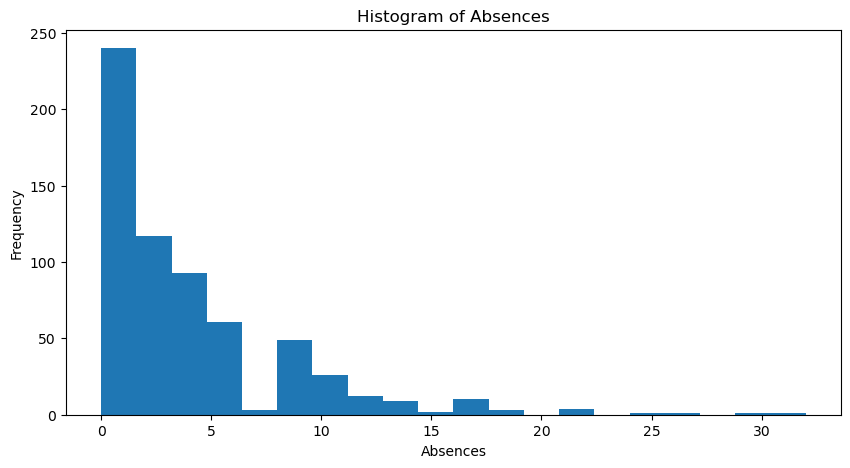

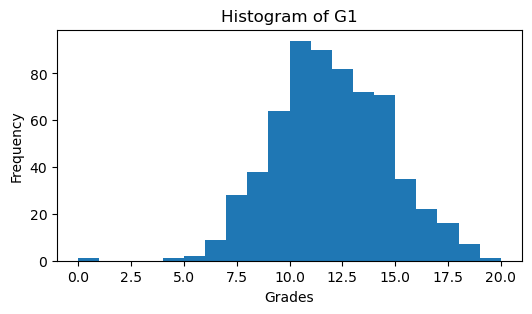

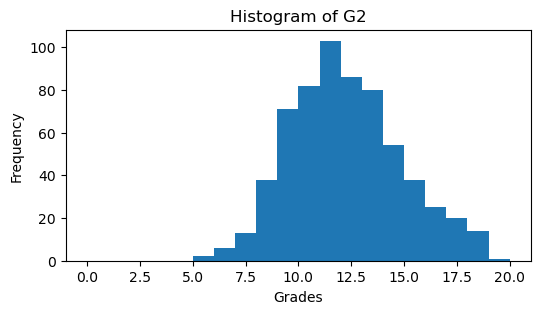

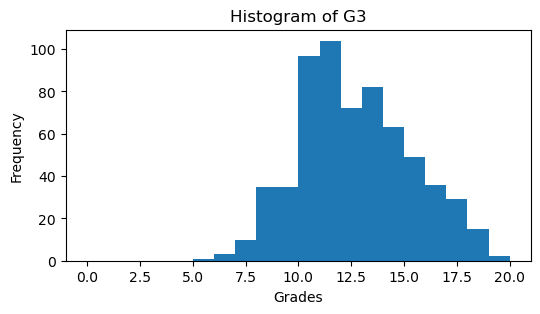

<Figure size 640x480 with 0 Axes>

In [34]:
# Get the numerical columns
numerical_col_names2 = ['absences', 'G1', 'G2', 'G3']

# Plot histograms for numerical variables
df2['absences'].hist(bins=20, figsize=(10,5), grid=False)
plt.xlabel("Absences")
plt.ylabel("Frequency")
plt.title("Histogram of Absences")
plt.show()
plt.clf()

# Plot histograms for numerical variables
grade_vars2 = ['G1', 'G2', 'G3']

for i in grade_vars2:
    df2[i].hist(bins=20, range=(0, 20), figsize=(6,3), grid=False)
    plt.xlabel("Grades")
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {i}")
    plt.show()
    plt.clf()

The histograms appear to have less outliers, smaller range, and more normal distributions.

Step 9: Plotting Pairwise Plots of df2 variable G3 against absences, G1, and G2

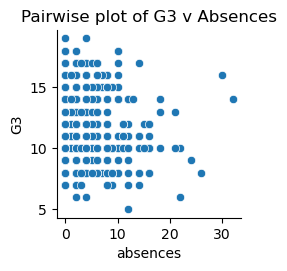

<Figure size 640x480 with 0 Axes>

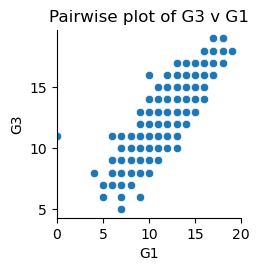

<Figure size 640x480 with 0 Axes>

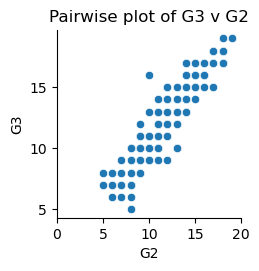

<Figure size 640x480 with 0 Axes>

In [35]:
# Pairplot of G3 v absences
sns.pairplot(data=df2, x_vars='absences', y_vars='G3')
plt.title("Pairwise plot of G3 v Absences")
plt.show()
plt.clf()

# Pairplot of G3 v G1
sns.pairplot(data=df2, x_vars='G1', y_vars='G3')
plt.gca().set_xlim(0, 20)
plt.title("Pairwise plot of G3 v G1")
plt.show()
plt.clf()


# Pairplot of G3 v G2
sns.pairplot(data=df2, x_vars='G2', y_vars='G3')
plt.gca().set_xlim(0, 20)
plt.title("Pairwise plot of G3 v G2")
plt.show()
plt.clf()

The absence plot of the Portuguese dataset shows less correlation than in the mathematics dataset. The pairwise plots of G3 v G1 and G3 v G2 are linearly correlated. G1 and G2 are likely candidates to be eliminated due to multicollinearity.

Step 10: Plotting Countplots for df2 Categorical Variables

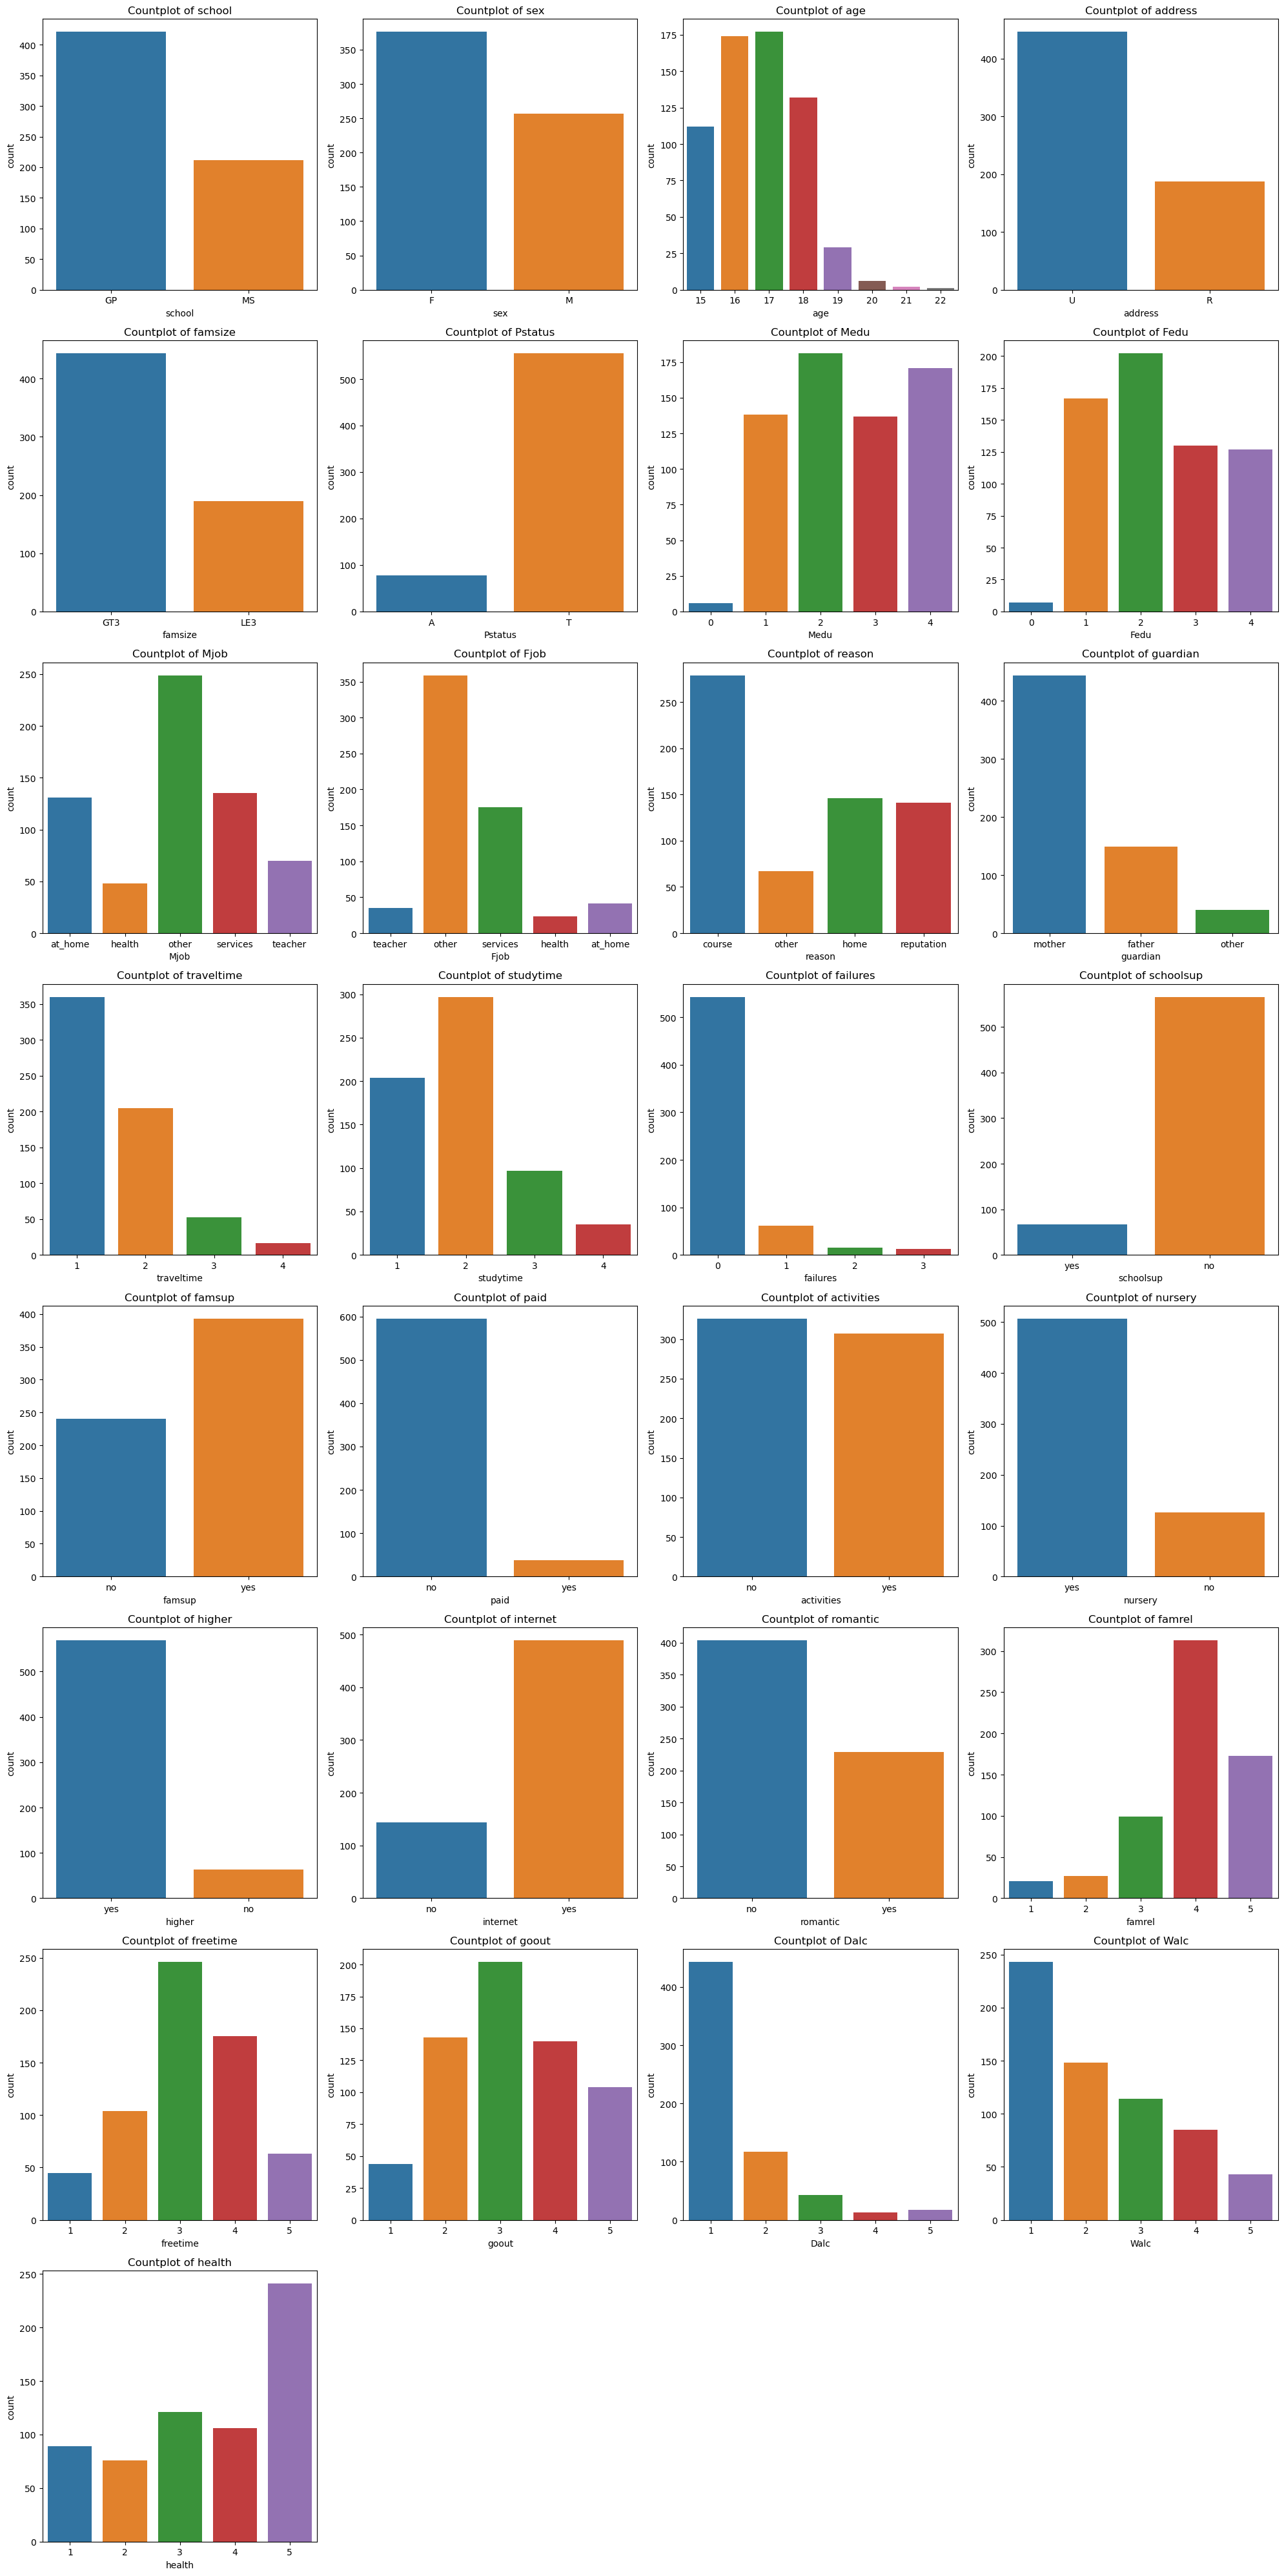

In [36]:
# Get the categorical columns
categorical_cols = df2.drop(numerical_col_names2, axis=1).columns.tolist()

num_plots = len(categorical_cols)
num_cols = 4
num_rows = (num_plots + num_cols - 1) // num_cols

# Plot count plots for categorical variables
plt.figure(figsize=(20, 40))
for i, col in enumerate(categorical_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.title(f"Countplot of {col}")
    sns.countplot(x=col, data=df2)

plt.tight_layout()
plt.show()

The countplots are similar, but with some minor variations, to the mathematics dataset.

Step 11: Plotting Boxplots of df2 variable G3 against Categorical Variables

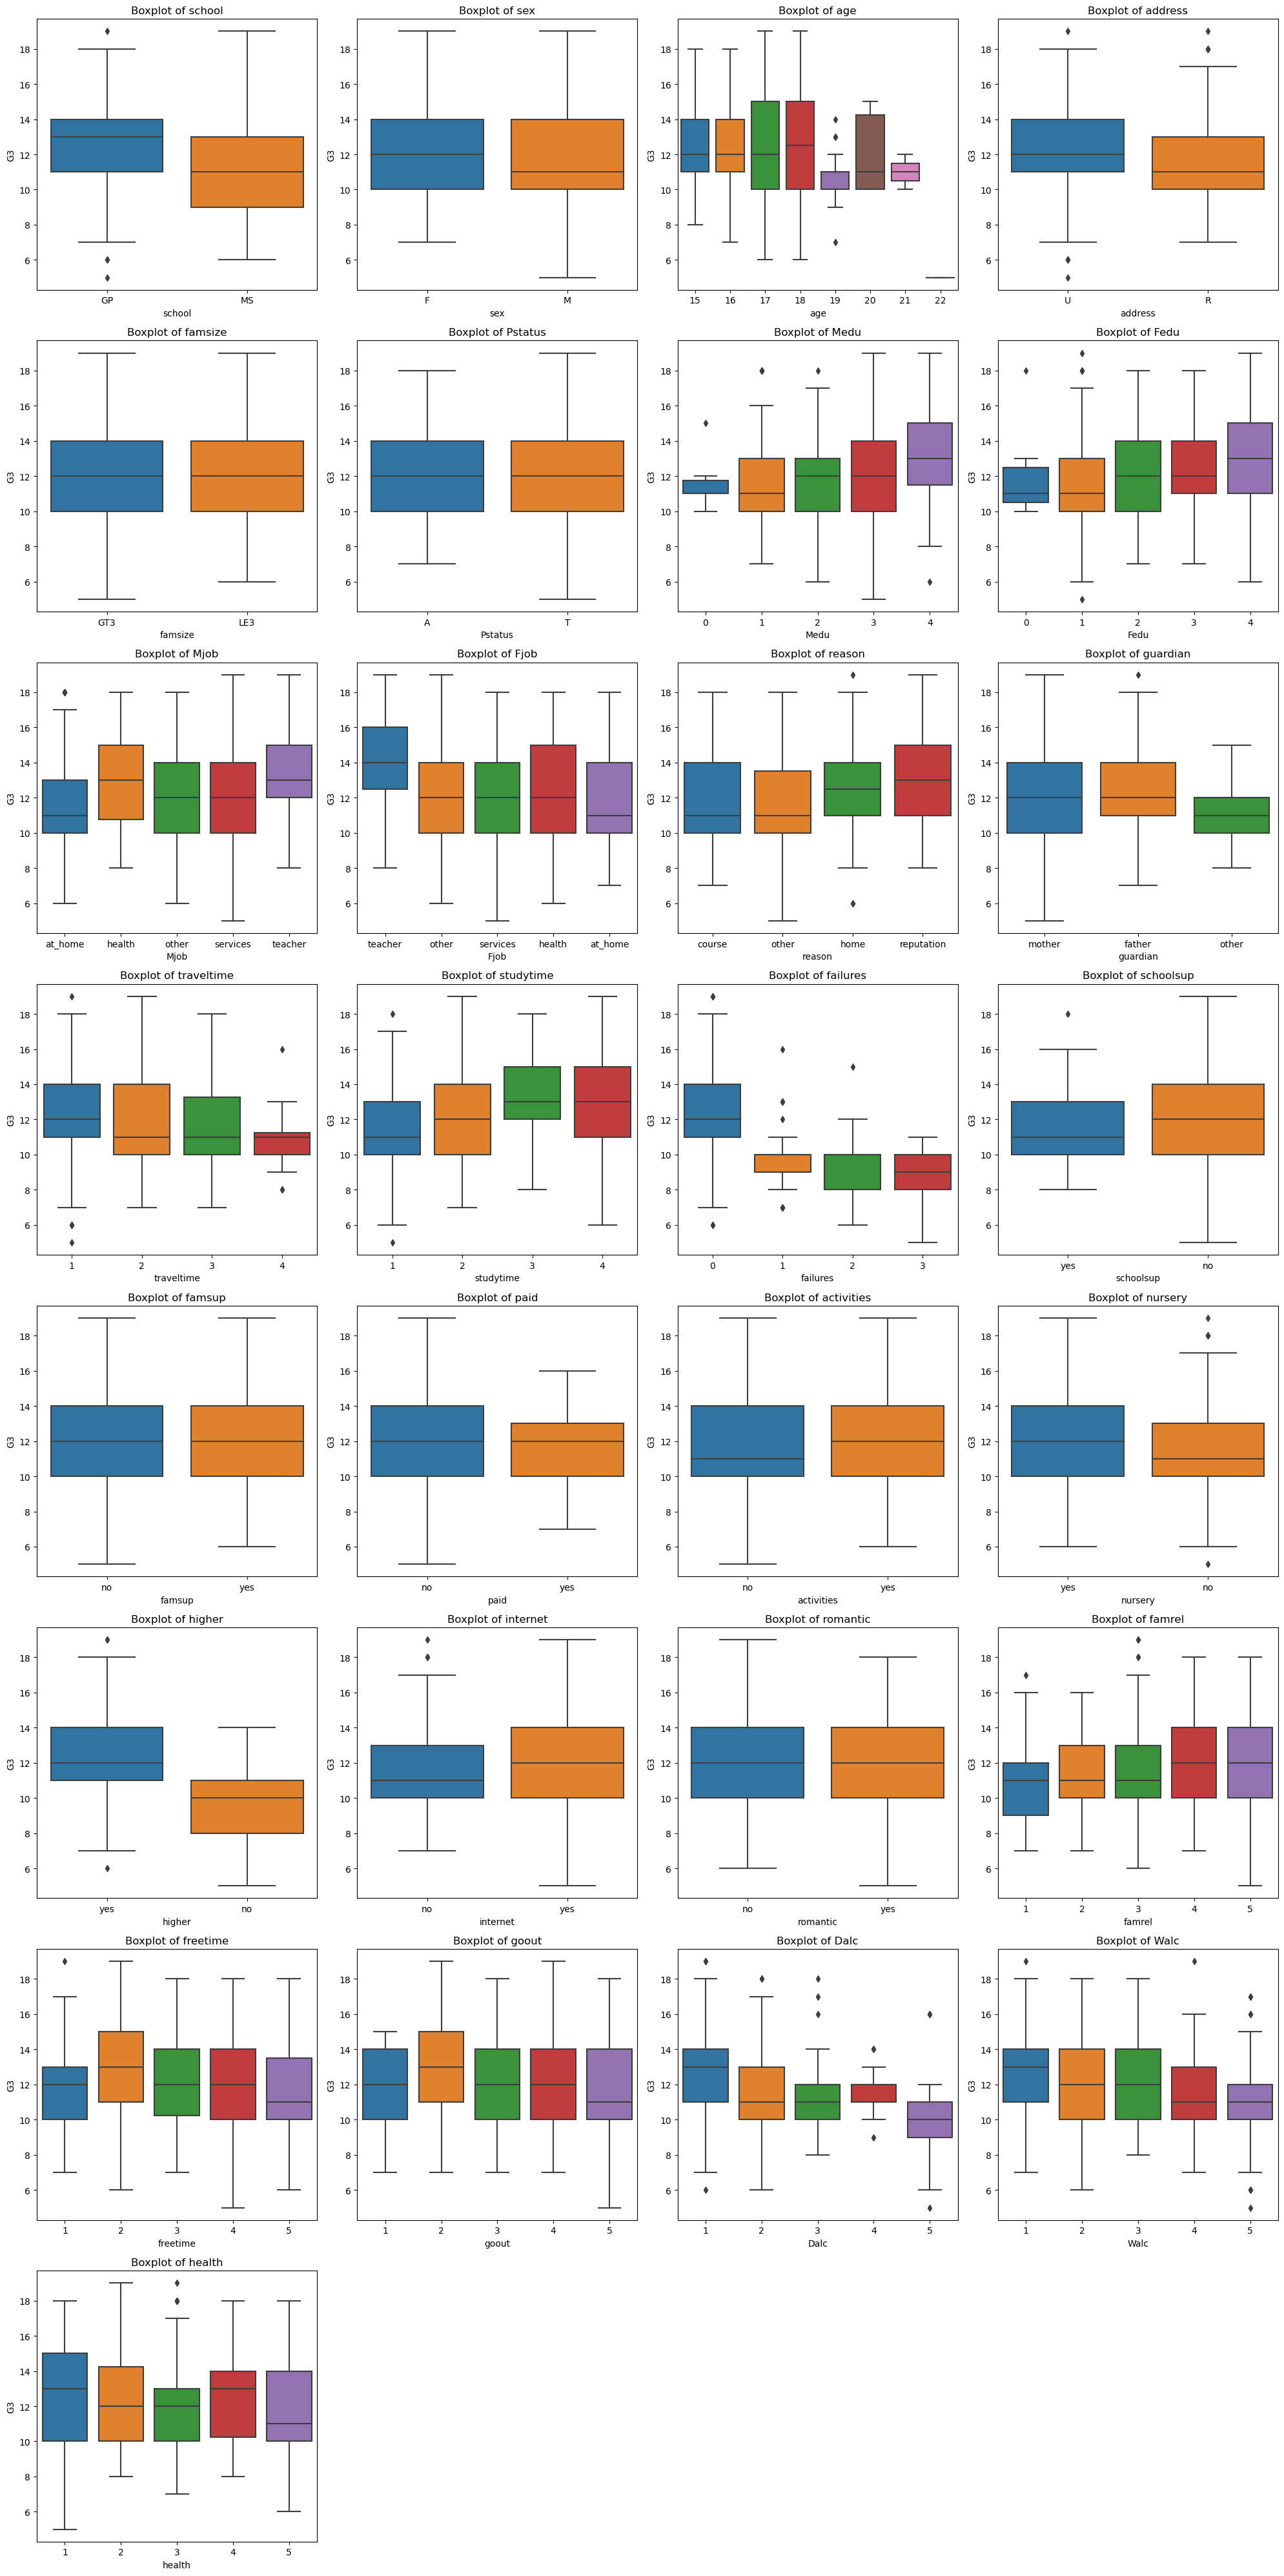

In [38]:
# plot boxplots for each categorical variable against the outcome variable 'G3'
plt.figure(figsize=(20,40))
for i, col in enumerate(categorical_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.title(f"Boxplot of {col}")
    sns.boxplot(x=col, y='G3', data=df2)

plt.tight_layout()
plt.show()

There appears to be less variations in the categories of the Portuguese dataset, although failures still looks like a reliable predictor of 'G3'.

Step 12: Examining df2 Covariance

In [5]:
# Defining function for eliminating predictors using eigenvalues and eigenvectors
def eliminate_predictors_eigen(covariance_matrix, predictors, k):
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    eigenpairs = [(np.abs(eigenvalues[i]), eigenvectors[:, i]) for i in range(len(eigenvalues))]
    eigenpairs.sort(key=lambda x: x[0], reverse=True)
    matrix_w = np.hstack((eigenpairs[i][1].reshape(covariance_matrix.shape[0], 1)) for i in range(k))
    reduced_covariance_matrix = np.dot(matrix_w.real, matrix_w.T.real)
    
    eliminated_predictors = []
    for i in range(len(eigenvalues) - k, len(eigenvalues)):
        eliminated_predictors.append(predictors[i])
    
    print(f"For the parameter {k}:")
    print("Eliminated predictors:", eliminated_predictors)
    
#     return reduced_covariance_matrix

# Defining function for eliminating predictors using Principal Component Analysis
def eliminate_predictors_pca(data, k):
    categorical_features = data.columns[data.dtypes == 'object'].tolist()
    numerical_features = data.columns[data.dtypes != 'object'].tolist()
    
    data_cat = pd.get_dummies(data[categorical_features])
    data_num = data[numerical_features]
    data = pd.concat([data_cat, data_num], axis=1)
    pca = PCA(n_components=k)
    reduced_data = pca.fit_transform(data)
    
    explained_variance = pca.explained_variance_ratio_
    components = pca.components_

    df_components = pd.DataFrame(components, columns=data.columns)
    df_components = df_components.T
    df_components['Explained Variance'] = explained_variance

    print(df_components)

    return reduced_data


# Dropping G1 and G2, which are too predictive of G3
drop_vars = ['G1','G2']
df2 = df2.drop(drop_vars,axis=1)

# Defining covariance matrix of df
covariance = df2.drop(['G3'],axis=1).cov()

# # Calling eliminate_predictors_eigen and printing results
for i in range(1,14):
    reduced_covariance_eigen = eliminate_predictors_eigen(covariance, df2.columns, i)
    print(reduced_covariance_eigen)

# Calling eliminate_predictors_pca and printing results
reduced_covariance_pca = eliminate_predictors_pca(df2, 57)
print(reduced_covariance_pca)


For the parameter 1:
Eliminated predictors: ['traveltime']
None
For the parameter 2:
Eliminated predictors: ['guardian', 'traveltime']
None
For the parameter 3:
Eliminated predictors: ['reason', 'guardian', 'traveltime']
None
For the parameter 4:
Eliminated predictors: ['Fjob', 'reason', 'guardian', 'traveltime']
None
For the parameter 5:
Eliminated predictors: ['Mjob', 'Fjob', 'reason', 'guardian', 'traveltime']
None
For the parameter 6:
Eliminated predictors: ['Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime']
None
For the parameter 7:
Eliminated predictors: ['Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime']
None
For the parameter 8:
Eliminated predictors: ['Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime']
None
For the parameter 9:
Eliminated predictors: ['famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime']
None
For the parameter 10:
Eliminated predictors: ['address', 'famsize', 'Pstatus', 'M

/var/folders/s7/x5q362k5511cxdwc3s3hr_5h0000gp/T/ipykernel_48867/2661462584.py:6: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  matrix_w = np.hstack((eigenpairs[i][1].reshape(covariance_matrix.shape[0], 1)) for i in range(k))


It appears that the 13 least relevant variables are as follows, from most to least relevant:

'school', 'sex', 'age', 'address', 

'famsize', 'Pstatus', 'Medu', 'Fedu', 

'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime'

For PCA, it appears that the least relevant variables are: 

school_GP, school_MS, sex_F, sex_M, address_R, 

address_U, famsize_GT3, famsize_LE3

After using Eigenvalues/Eigenvectors and PCA, the following variables should be dropped:

school_GP, school_MS, sex_F, sex_M, address_R, address_U, famsize_GT3, famsize_LE3

age, Pstatus_A, Pstatus_T, reason_course, reason_home, reason_other, reason_ reputation, 

guardian_mother, guardian_father, guardian_other, traveltime, Medu, Fedu


Step 13: Testing random forest regression for df2, with G3 as the outcome variable

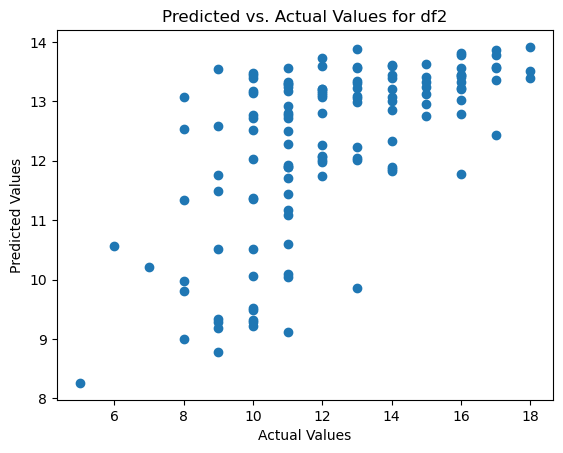

<Figure size 640x480 with 0 Axes>

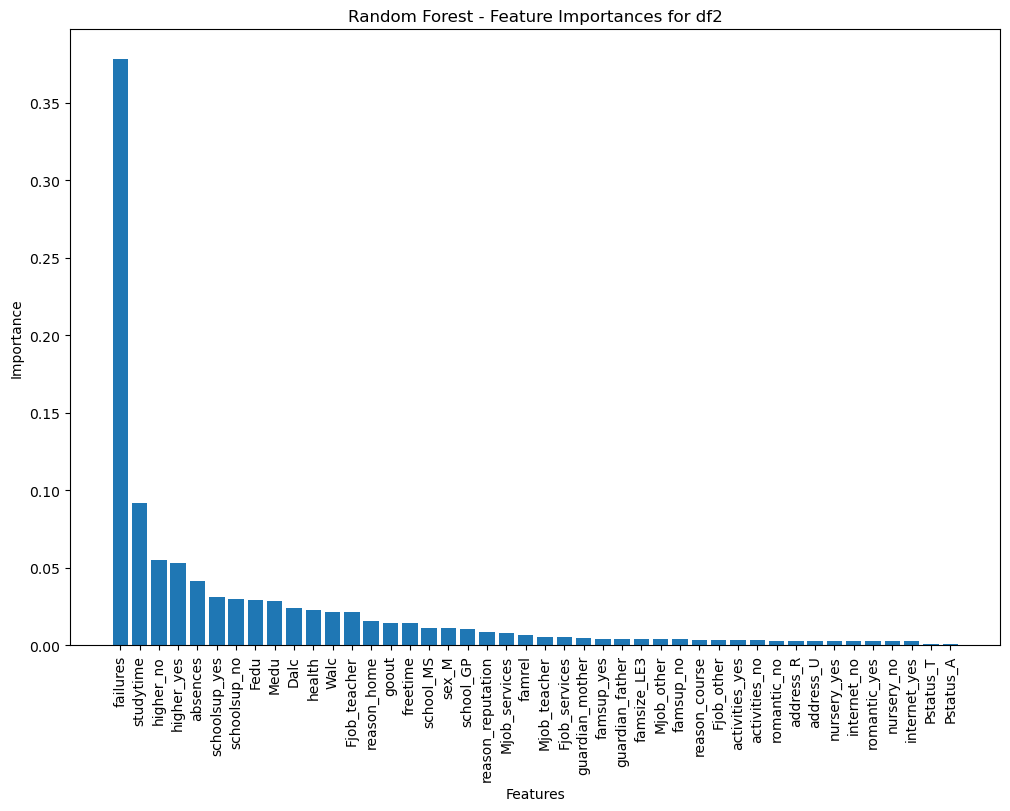

<Figure size 640x480 with 0 Axes>

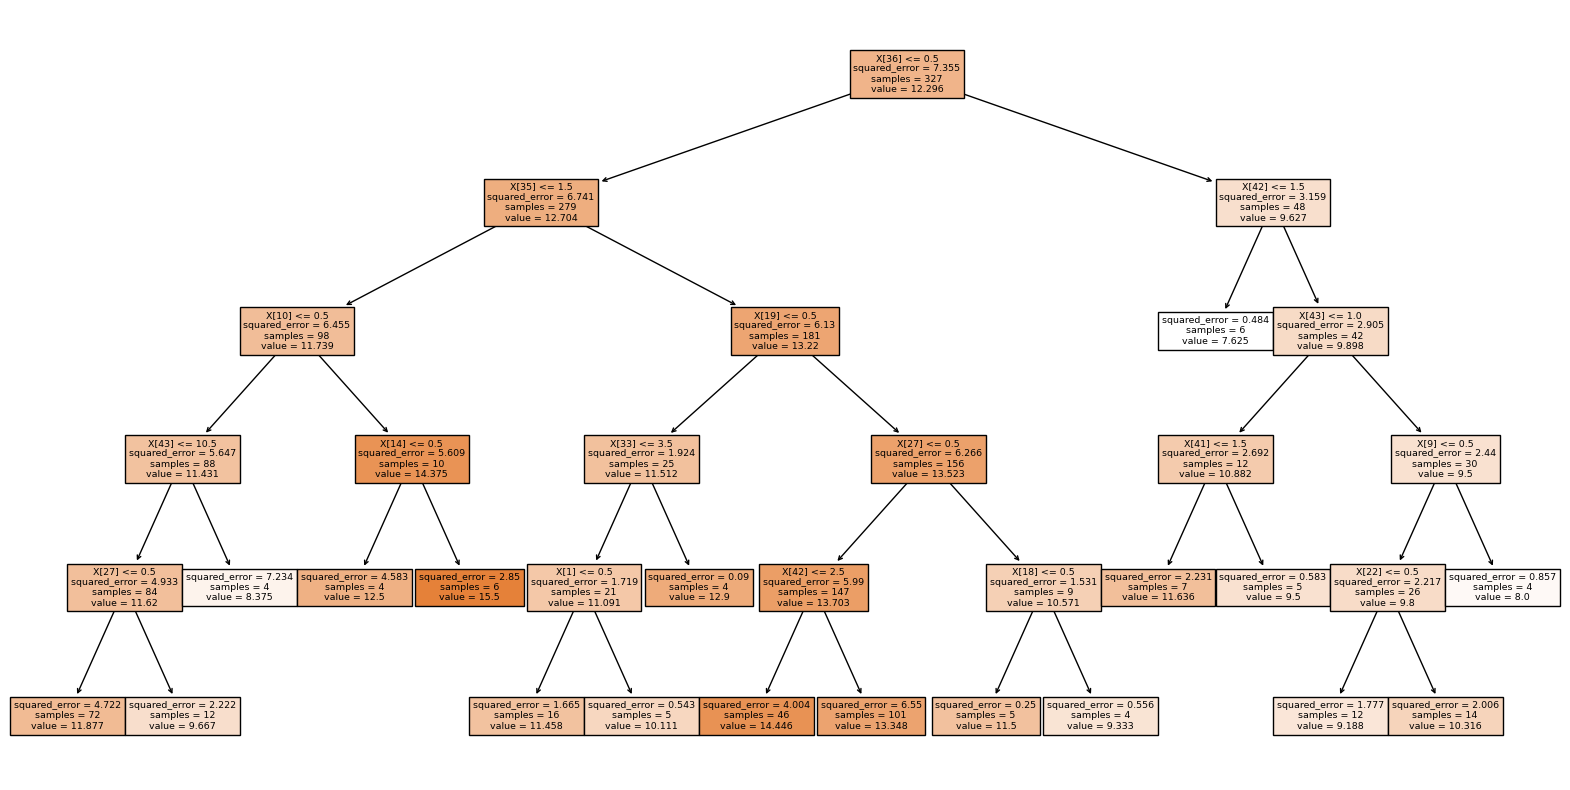

min_samples_split: 2
min_samples_leaf: 4
max_leaf_nodes: 30
random_state: 1
failures 3.78e-01
studytime 9.15e-02
higher_no 5.51e-02
higher_yes 5.30e-02
absences 4.14e-02
schoolsup_yes 3.13e-02
schoolsup_no 2.99e-02
Fedu 2.91e-02
Medu 2.83e-02
Dalc 2.42e-02
health 2.26e-02
Walc 2.16e-02
Fjob_teacher 2.13e-02
reason_home 1.55e-02
goout 1.47e-02
freetime 1.46e-02
school_MS 1.13e-02
sex_M 1.11e-02
school_GP 1.03e-02
reason_reputation 8.38e-03
Mjob_services 8.09e-03
famrel 6.67e-03
Mjob_teacher 5.62e-03
Fjob_services 5.23e-03
guardian_mother 5.06e-03
famsup_yes 4.04e-03
guardian_father 3.89e-03
famsize_LE3 3.88e-03
Mjob_other 3.85e-03
famsup_no 3.77e-03
reason_course 3.46e-03
Fjob_other 3.43e-03
activities_yes 3.24e-03
activities_no 3.23e-03
romantic_no 2.84e-03
address_R 2.74e-03
address_U 2.74e-03
nursery_yes 2.65e-03
internet_no 2.63e-03
romantic_yes 2.62e-03
nursery_no 2.54e-03
internet_yes 2.54e-03
Pstatus_T 9.17e-04
Pstatus_A 8.68e-04
|--- failures <= 0.50
|   |--- studytime <= 1.50
|

In [6]:
def regression_ensemble(df, target_column, test_size=0.2, random_state=0):
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
#     categorical_features = X_train.columns[X_train.dtypes == 'object'].tolist()
#     numerical_features = X_train.columns[X_train.dtypes != 'object'].tolist()
    
    param_grid = {'n_estimators': [10000],
                  'max_depth': [5],
                  'min_samples_split': [2],
                  'min_samples_leaf': [4],
                  'max_features': ['auto'],
                  'max_leaf_nodes': [30],
                  'random_state': [1, 42, 123]}

    reg = RandomForestRegressor()
    grid_search = GridSearchCV(reg, param_grid, scoring='neg_mean_squared_error', cv=5)
    grid_search.fit(X_train, y_train)
    
    # Get the best estimator from the grid search
    best_reg = grid_search.best_estimator_

    y_pred = grid_search.predict(X_test)
    
    score = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    predictors = X_train.columns
    coefficients = best_reg.feature_importances_
    
    sorted_index = np.argsort(-coefficients)

    # Sort the predictors and coefficients by importance
    predictors = predictors[sorted_index]
    coefficients = coefficients[sorted_index]
    
    # Plot predicted values against actual values
    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"Predicted vs. Actual Values for df2")
    plt.show()
    plt.clf()
    
    # Plot feature importances
    plt.figure(figsize=(12,8))
    plt.bar(predictors, coefficients)
    plt.xlabel("Features")
    plt.ylabel("Importance")
    plt.title("Random Forest - Feature Importances for df2")
    plt.xticks(rotation=90)
    plt.show()
    plt.clf()
    
    plt.figure(figsize=(20,10))
    plt.title("Random Forest Regression Tree")
    tree.plot_tree(best_reg.estimators_[0], filled=True)
    plt.show()
    
    predictors_coefficients = list(zip(predictors, coefficients))
    predictors_coefficients.sort(key=lambda x: x[1], reverse=True)
    
    min_samples_split = best_reg.get_params()['min_samples_split']
    min_samples_leaf = best_reg.get_params()['min_samples_leaf']
    max_leaf_nodes = best_reg.get_params()['max_leaf_nodes']
    random_state = best_reg.get_params()['random_state']

    print("min_samples_split:", min_samples_split)
    print("min_samples_leaf:", min_samples_leaf)
    print("max_leaf_nodes:", max_leaf_nodes)
    print("random_state:", random_state)
    
    for predictor, coefficient in predictors_coefficients:
        print(predictor, '{:.2e}'.format(coefficient))
    
    tree_text = export_text(best_reg.estimators_[0], feature_names=X_train.columns.tolist())
    print(tree_text)
    
    return score, mse



eliminated_predictors2 = ['age', 'sex_F', 'paid_no', 'paid_yes', 'guardian_other',
                          'famsize_GT3', 'traveltime', 'reason_other', 'Mjob_health',
                          'Fjob_at_home', 'Fjob_health', 'Mjob_at_home']

# Predictors to eliminate: 'age', 'sex_F', 'paid_no', 'paid_yes', 'guardian_other', 
#                          'famsize_GT3', 'traveltime', 'reason_other', 'Mjob_health',
#                          'Fjob_at_home', 'Fjob_health', 'Mjob_at_home'
# Predictors to keep: 'sex_M', 'Pstatus_A', 'Pstatus_T','famsize_LE3', 'Dalc', 'guardian_mother',
#                     'guardian_father', 'reason_home', 'internet_yes', 'internet_no', 'Fjob_health',
#                     'romantic_yes', 'romantic_no', 'Fedu', 'Fjob_other', 'nursery_yes', 'nursery_no',
#                     'activities_no', 'activities_yes'


categorical_features = df2.columns[df2.dtypes == 'object'].tolist()
numerical_features = df2.columns[df2.dtypes != 'object'].tolist()

df2_cat = pd.get_dummies(df2[categorical_features])
df2_num = df2[numerical_features]
df2 = pd.concat([df2_cat, df2_num], axis=1)

df2 = df2.drop(eliminated_predictors2, axis=1)

print(regression_ensemble(df2, 'G3', test_size=0.2, random_state=1))

Random Forest Regression is chosen, since all predictor variables except for 'absences' is categorical, and the outcome variable 'G3' is numerical.

The initial Random Forest Regression, where all variables were kept, only yields a score and MSE of (0.3530637773103258, 4.842736175997303).

In the beginning, the following variables were dropped: 

school_GP, school_MS, sex_F, sex_M, address_R, address_U, famsize_GT3, famsize_LE3, age, Pstatus_A, Pstatus_T, 

reason_course, reason_home, reason_other, reason_ reputation,  guardian_mother, guardian_father, guardian_other, 

traveltime, Medu, Fedu

After manually testing and using different combinations of eliminated predictors, as well as using GridSearchCV to adjust hyperparameters, the final set eliminated_predictors1 yielded the highest score and lowest MSE of (0.3643901136930566, 4.757951220358058).

The following hyperparameters of GridSearchCV were used: 

'n_estimators': [10000],

'max_depth': [5],

'min_samples_split': [2],

'min_samples_leaf': [4],

'max_features': ['auto'],

'max_leaf_nodes': [30]

'random_state' [1, 42, 123]

Increasing n_estimators to 10000 did lead to longer processing times, but also lead to increased results in score and MSE. The max_depth was set at 5 to compensate for the high n_estimators, thus balancing out in terms of overfitting and underfitting. The best random_state was 1.

Step 14: Analysis

Initial exploratory analysis of the data, which was shown in the histograms, pairwise plots, countplots, and boxplots, showed that quite a few of the variables had noticeable variance in G3, the final grade for the students. These charts weren't sufficient for eliminating predictors.

The next step was to use Eigenvalues and Eigenvectors, as well as Principal Component Analysis, to filter out the less impactful and less relevant variables. 

Random Forest Regression and GridSearchCV were used to find the best combination of predictors. 


The 10 most signifant predictors and their coefficients for the mathematics dataset in descending order are: 

absences 2.60e-01

failures 2.24e-01

goout 4.64e-02

age 4.56e-02

Medu 4.16e-02

health 3.67e-02

freetime 3.42e-02

studytime 2.28e-02

Fedu 1.91e-02

Mjob_at_home 1.87e-02


The 10 most significant predictors and their coefficients for the Portuguese dataset in descending order are:

failures 3.78e-01

studytime 9.15e-02

higher_no 5.51e-02

higher_yes 5.30e-02

absences 4.14e-02

schoolsup_yes 3.13e-02

schoolsup_no 2.99e-02

Fedu 2.91e-02

Medu 2.83e-02

Dalc 2.42e-02



The common predictors from both sets of top 10 predictors include:

absences, failures, Medu, studytime, and Fedu

failures is the 2nd most important and 1st most important predictor for both the math and Portuguese datasets. This is expected, as having failed previous classes may be an indicator of poor academic ability. 

absences is the 1st most important and 5th most important predictor for both the math and Portuguese datasets. This is expected, as missing class hurts the ability for students to comprehend the curriculum.

Medu is the 5th most important and 9th most important predictor for both the math and Portuguese datasets. Although this makes sense, it ranks higher than variables such as health.

studytime is the 8th most important and 2nd most important predictor for both the math and Portuguese datasets. This is expected, as studying is necessary to increase comprehension of the curriculum.

Fedu is the 9th most important and 8th most important predictor for both the math and Portuguese datasets. What was said about Medu also applies to Fedu.

Of the 5 common variables, 3 of them, absences, failures, and studytime, are theoretically within control of the students. Although environmental circumstances can restrict a student's ability to reduce absences, avoid failures, and increase studytime.



Step 15: Conclusion

A majority of the variables in both datasets were kept in the final model. That said, only a few of them had any true significance. absences, failures, and studytime were all significant predictors. The implication is that discipline is relevant towards academic performane. Aside from the previous three predictors, goout, health, freetime, higher_no, higher_yes, and Dalc made the top ten of either the math dataset or the Portuguese dataset. These variables are all related to discipline, motivation, and priorities, although these variables aren't always within the control of the students. 

It's also important to note that neither model had an r^2 score above 0.50, so the accuracy of the model isn't high. This might be due to noise in the data, or that there are other variables at play that aren't reflected in the data. In the future, more data can be gathered, with even more attributes to measure different aspects of student life and academics. For examples, failures was included in the data, but the overall academic performance of each student beyond mathematics and Portuguese courses isn't reflected at all. Additional academic factors that may be helpful include disciplinary history, level of difficulty of coursework, and available school resources. Other attributes, such as household income and specific hobbies, may also be helpful. Furthermore, the actual curricilumn of the mathematics and Portuguese courses aren't described, which is important given the significant deviations in G3 values between both courses. Even more advanced algorithms can be used, although Random Forest is already well-suited for analysing these datasets.

In the end, having certain advantages, such as parents having better education, can benefit academic performance, much of the responsibility still falls upon the students.